# Algorithm Evaluation
~~~
Purpose is to select which is best algorithm for a given dataset
~~~

In [90]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [91]:
import pandas as pd

df1 = pd.read_csv("train_titanic.csv")
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [92]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [93]:
s = df1.isna().sum()
s

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [94]:
s[s>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

### Separate X and Y(Separate dependent and independent features)

In [95]:
X = df1.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
Y = df1[['Survived']]

In [96]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [97]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Perform cat, con separation

In [98]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [99]:
cat

['Sex', 'Cabin', 'Embarked']

In [100]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [101]:
cat1 = ['Sex', 'Embarked']
cat2 = ['Cabin']

### Build a Pipeline

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [103]:
# Numerical Pipeline

num_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])

# Categorical Pipeline 1

cat_pipe1 = Pipeline(steps=[('imputer', SimpleImputer(strategy="most_frequent")),
                            ("ohe", OneHotEncoder(handle_unknown='ignore'))])

# Categorical Pipeline 2

cat_pipe2 = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
                            ('ohe', OneHotEncoder(handle_unknown='ignore'))])

#Combine Pipeline with Column Transformer

pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat1', cat_pipe1, cat1),
                         ('cat2', cat_pipe2, cat2)])

In [104]:
X_pre = pre.fit_transform(X).toarray()
X_pre

array([[ 0.82737724, -0.5924806 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.63878901,  0.43279337, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.2846632 , -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724,  0.        ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.2846632 , -0.4745452 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.17706291, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ]])

In [105]:
cols = pre.get_feature_names_out()
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat1__Sex_female', 'cat1__Sex_male', 'cat1__Embarked_C',
       'cat1__Embarked_Q', 'cat1__Embarked_S', 'cat2__Cabin_A10',
       'cat2__Cabin_A14', 'cat2__Cabin_A16', 'cat2__Cabin_A19',
       'cat2__Cabin_A20', 'cat2__Cabin_A23', 'cat2__Cabin_A24',
       'cat2__Cabin_A26', 'cat2__Cabin_A31', 'cat2__Cabin_A32',
       'cat2__Cabin_A34', 'cat2__Cabin_A36', 'cat2__Cabin_A5',
       'cat2__Cabin_A6', 'cat2__Cabin_A7', 'cat2__Cabin_B101',
       'cat2__Cabin_B102', 'cat2__Cabin_B18', 'cat2__Cabin_B19',
       'cat2__Cabin_B20', 'cat2__Cabin_B22', 'cat2__Cabin_B28',
       'cat2__Cabin_B3', 'cat2__Cabin_B30', 'cat2__Cabin_B35',
       'cat2__Cabin_B37', 'cat2__Cabin_B38', 'cat2__Cabin_B39',
       'cat2__Cabin_B4', 'cat2__Cabin_B41', 'cat2__Cabin_B42',
       'cat2__Cabin_B49', 'cat2__Cabin_B5', 'cat2__Cabin_B50',
       'cat2__Cabin_B51 B53 B55', 'cat2__Cabin_B57 B59 B63 B66',
       'cat2__Cabin_B58 B60',

In [106]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat1__Sex_female,cat1__Sex_male,cat1__Embarked_C,cat1__Embarked_Q,cat1__Embarked_S,...,cat2__Cabin_F E69,cat2__Cabin_F G63,cat2__Cabin_F G73,cat2__Cabin_F2,cat2__Cabin_F33,cat2__Cabin_F38,cat2__Cabin_F4,cat2__Cabin_G6,cat2__Cabin_T,cat2__Cabin_unknown
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0.827377,0.000000,0.432793,2.008933,-0.176263,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train Test Split

In [107]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [108]:
xtrain.shape

(712, 158)

In [109]:
xtest.shape

(179, 158)

### Evaluating Algorithm

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [111]:
dct = {'LogisticRegression': LogisticRegression(),
       'DecisionTree' : DecisionTreeClassifier(),
       'RandomForest' : RandomForestClassifier(),
       'GradientBoostingClassifier' : GradientBoostingClassifier(),
       'SVM' :  SVC()}

In [112]:
dct.items()

dict_items([('LogisticRegression', LogisticRegression()), ('DecisionTree', DecisionTreeClassifier()), ('RandomForest', RandomForestClassifier()), ('GradientBoostingClassifier', GradientBoostingClassifier()), ('SVM', SVC())])

In [113]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

tr=[]
tr_cv = []
ts = []

for name, model in dct.items():

    # fit the model on training data
    model.fit(xtrain, ytrain)

    #Predict train and test results
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)

    #Calculate f1 score
    f1_tr = f1_score(ytrain, ypred_tr)

    #Calculate f1 Cross Validated Results
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1')
    f1_tr_cv = scores.mean()

    #Calculating f1 score for testing
    f1_ts = f1_score(ytest, ypred_ts)

    #Append all values in the list
    tr.append(f1_tr)
    tr_cv.append(f1_tr_cv)
    ts.append(f1_ts)

    #printing all results
    print(f'Model Name : {name} \n')
    print(f'F1 training : {f1_tr: .4f}')
    print(f'F1 training CV : {f1_tr_cv: .4f}')
    print(f'F1 testing : {f1_ts: .4f}')

    print('\n==========================================================')



Model Name : LogisticRegression 

F1 training :  0.7707
F1 training CV :  0.7069
F1 testing :  0.7778

Model Name : DecisionTree 

F1 training :  0.9791
F1 training CV :  0.6924
F1 testing :  0.7785

Model Name : RandomForest 

F1 training :  0.9791
F1 training CV :  0.7261
F1 testing :  0.7463

Model Name : GradientBoostingClassifier 

F1 training :  0.8589
F1 training CV :  0.7575
F1 testing :  0.7407

Model Name : SVM 

F1 training :  0.7732
F1 training CV :  0.7551
F1 testing :  0.7660



### Create a dataframe for model evaluation

In [147]:
dct_eval ={'Name': list(dct.keys()),
           'TrainF1':tr,
           'TrainF1CV':tr_cv,
           'TestF1':ts}

In [148]:
df1_eval = pd.DataFrame(dct_eval)
df1_eval

,Name,TrainF1,TrainF1CV,TestF1
0,LogisticRegression,0.770713,0.706946,0.777778
1,DecisionTree,0.979127,0.692426,0.778523
2,RandomForest,0.979127,0.726133,0.746269
3,GradientBoostingClassifier,0.858871,0.757452,0.740741
4,SVM,0.773176,0.755126,0.765957


In [116]:
df1_eval.sort_values(by = "TestF1", ascending=False)

,Name,TrainF1,TrainF!CV,TestF1
1,DecisionTree,0.979127,0.692426,0.778523
0,LogisticRegression,0.770713,0.706946,0.777778
4,SVM,0.773176,0.755126,0.765957
2,RandomForest,0.979127,0.726133,0.746269
3,GradientBoostingClassifier,0.858871,0.757452,0.740741


### Select Logistic Regression Model

~~~
Performing hypermeter tuning on top model
~~~

In [117]:
params = {'C' : [0.001, 0.01, 0.1, 1, 10, 50, 100, 1000]}


In [118]:
from sklearn.model_selection import RandomizedSearchCV

lr = LogisticRegression()
rscv = RandomizedSearchCV(lr, param_distributions=params, cv= 5, scoring='f1', random_state=21)
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 50, 100,
                                              1000]},
                   random_state=21, scoring='f1')

In [119]:
rscv.best_params_

{'C': 10}

In [120]:
rscv.best_score_

0.724031219325337

In [121]:
best_lr = rscv.best_estimator_
best_lr

LogisticRegression(C=10)

### Evaluate train and test data

In [122]:
best_lr.score(xtrain, ytrain)

0.851123595505618

In [123]:
best_lr.score(xtest, ytest)

0.8044692737430168

### Predict train and test data

In [124]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [125]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [126]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [127]:
ypred_ts[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [128]:
ypred_ts[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

### Create a Confusion matrix

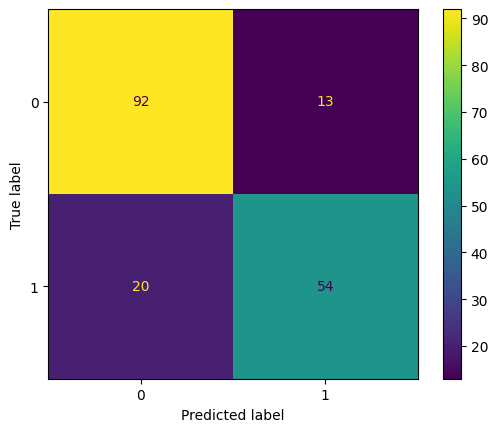

In [129]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_lr.classes_)
cfd.plot()

### Print Classification Report on test data

In [130]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



### Calculating ROC - AUC Score

In [131]:
yprob_tr = best_lr.predict_proba(xtrain)[:,1]
yprob_ts = best_lr.predict_proba(xtest)[:,1]

In [132]:
yprob_tr[0:5]

array([0.07443491, 0.23560731, 0.08904088, 0.07825619, 0.45362964])

In [133]:
yprob_ts[0:5]

array([0.09120328, 0.1846057 , 0.1323635 , 0.89843722, 0.75510086])

### Check ROC - AUC Score in Testing

In [134]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytrain, yprob_tr)

0.8894505512975662

### Plot the ROC AUC Score

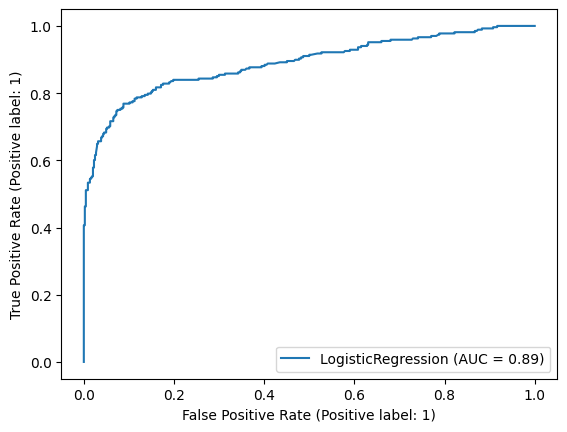

In [135]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_lr, xtrain, ytrain)

### Predict the test.titanic CSV

In [136]:
xnew = pd.read_csv("test_titanic.csv")
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [137]:
xnew_pre = pre.transform(xnew).toarray()
xnew_pre

array([[ 0.82737724,  0.36944878, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724,  1.33137817,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.36936484,  2.48569343, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724,  0.67726619, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724,  0.        , -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724,  0.        ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ]])

In [138]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat1__Sex_female,cat1__Sex_male,cat1__Embarked_C,cat1__Embarked_Q,cat1__Embarked_S,...,cat2__Cabin_F E69,cat2__Cabin_F G63,cat2__Cabin_F G73,cat2__Cabin_F2,cat2__Cabin_F33,cat2__Cabin_F38,cat2__Cabin_F4,cat2__Cabin_G6,cat2__Cabin_T,cat2__Cabin_unknown
0,0.827377,0.369449,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.827377,1.331378,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.369365,2.485693,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.827377,-0.207709,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.827377,-0.592481,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.827377,0.000000,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
414,-1.566107,0.715743,-0.474545,-0.473674,1.544246,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415,0.827377,0.677266,-0.474545,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
416,0.827377,0.000000,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [139]:
# Predict Values

preds = best_lr.predict(xnew_pre)
probs = best_lr.predict_proba(xnew_pre)[:,1]

In [140]:
preds[0:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [141]:
probs[0:5]

array([0.10923264, 0.37694889, 0.08953515, 0.10560472, 0.58302209])

### Creating results in new dataframe

In [142]:
df1_res = xnew[['PassengerId']]
df1_res

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [143]:
df1_res['Survived'] = preds
df1_res['Probability'] = probs

In [144]:
df1_res

,PassengerId,Survived,Probability
0,892,0,0.109233
1,893,0,0.376949
2,894,0,0.089535
3,895,0,0.105605
4,896,1,0.583022
...,...,...,...
413,1305,0,0.096263
414,1306,1,0.961792
415,1307,0,0.071113
416,1308,0,0.096263


<Axes: xlabel='Survived'>

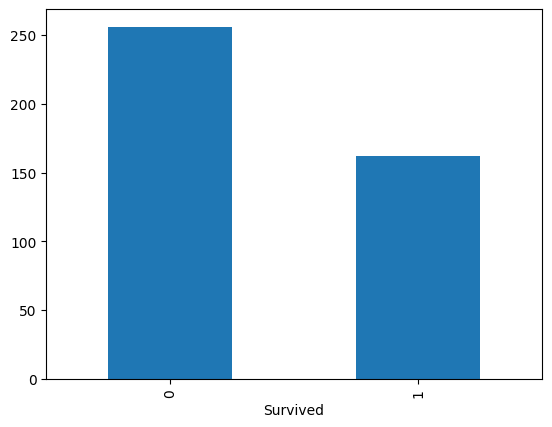

In [145]:
df1_res['Survived'].value_counts().plot(kind="bar")

In [146]:
df1_res.to_csv("results.csv", index=False)